In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('weatherAUS.csv')


In [3]:
df.dropna(inplace=True)

In [4]:
columns_to_standardize = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                           'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                           'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [5]:
for column in columns_to_standardize:
    df[column + '_T'] = (df[column] - df[column].mean()) / df[column].std()

In [6]:
# Function to perform KMeans without scikit-learn
def custom_kmeans(data, k, max_iter=100):
    # Randomly initialize centroids
    centroids = data.sample(k).values
    
    for _ in range(max_iter):
        # Assign each point to the nearest centroid
        distances = np.linalg.norm(data.values[:, None, :] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Update centroids
        centroids = np.array([data[labels == j].mean(axis=0) for j in range(k)])
    
    return labels

NameError: name 'means' is not defined

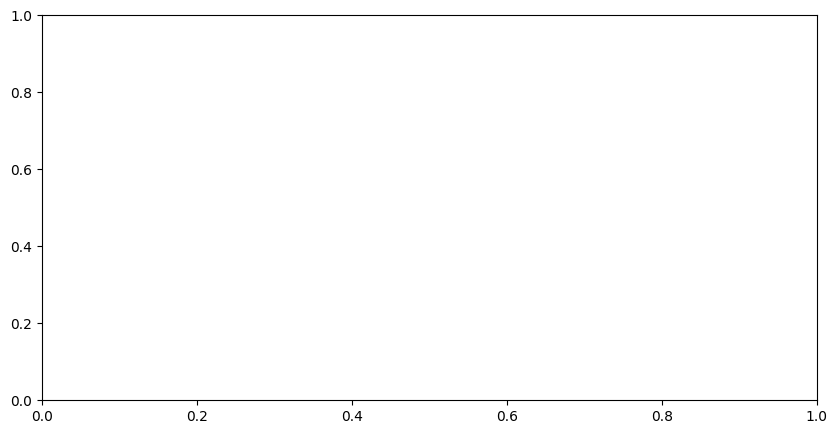

In [27]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        labels = custom_kmeans(data, k)
        inertia = np.sum(np.min(np.linalg.norm(data.values[:, None, :] - 
                                              data.values[labels, None, :], axis=2), axis=1))
        
        means.append(k)  # Corrected variable name here
        inertias.append(inertia)

    # Generate the elbow plot
fig, _ = plt.subplots(figsize=(10, 5))
plt.plot(means, inertias, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
